In [2]:
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df=load_dataset('lukebarousse/data_jobs',split='train').to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_us_da=df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy().dropna(subset=['salary_year_avg'])
df_exploaded =df_us_da.explode('job_skills')

In [4]:
df_pct=(df_exploaded.groupby('job_skills')['salary_year_avg']
            .agg(['count','median'])
            .sort_values(by='count',ascending=False)
            .rename(columns={'median':'Median Salary','count':'Skill Count'})
            )

In [5]:
total=len(df_us_da)
df_pct['Skill Percent']=(df_pct['Skill Count']/total)*100
df_pct

,Skill Count,Median Salary,Skill Percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [6]:
df_pct=df_pct[df_pct['Skill Percent']>5]
df_pct

,Skill Count,Median Salary,Skill Percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [7]:
#column with dict to dataframe 
df_tech=df_us_da['job_type_skills'].copy().drop_duplicates().dropna()
tech_dict={}
for row in df_tech:
    row_dict=ast.literal_eval(row)
    for key,value in row_dict.items():
        if key in tech_dict:
            tech_dict[key]+=value
        else:
            tech_dict[key]=value
for k,v in tech_dict.items():
    tech_dict[k]=list(set(v)) 
tech_df=pd.DataFrame(list(tech_dict.items()),columns=['Technology','Skills'])
tech_df=tech_df.explode('Skills')
tech_df

,Technology,Skills
0,analyst_tools,outlook
0,analyst_tools,power bi
0,analyst_tools,sap
0,analyst_tools,word
0,analyst_tools,sas
...,...,...
9,sync,webex
9,sync,twilio
9,sync,wire
9,sync,unify


In [8]:
df_plot=df_pct.merge(tech_df,right_on='Skills',left_on='job_skills')
df_plot

,Skill Count,Median Salary,Skill Percent,Technology,Skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


4 [-0.37524044 -0.70941175]
5 [-0.13836797 -0.43935927]


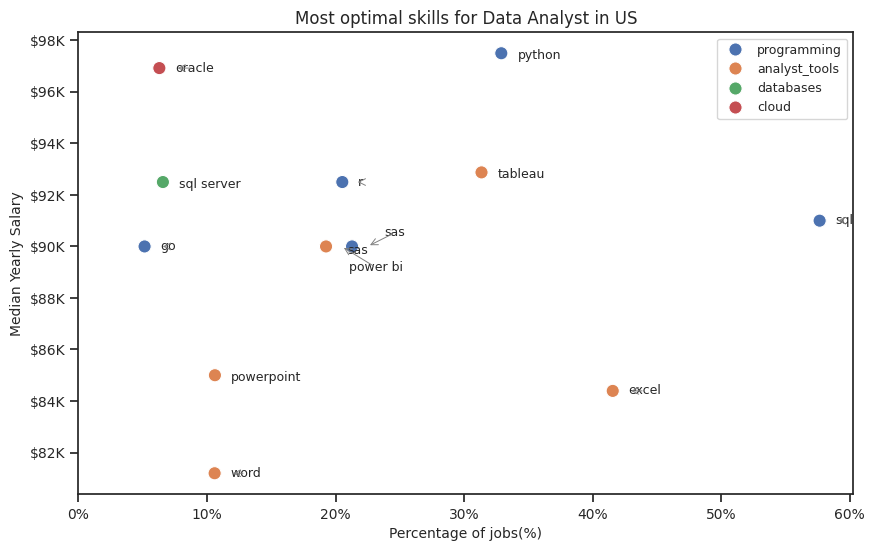

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
sns.set_theme(style='ticks')
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_plot,
    x='Skill Percent',
    y='Median Salary',
    hue='Technology',
    s=90
)
texts = []
for x, y, label in zip(df_plot['Skill Percent'], df_plot['Median Salary'], df_plot['Skills']):
    texts.append(plt.text(x + 1.2, y, label, va='center', fontsize=9))
# Adjust text to avoid overlap
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.7),
    force_points=0.4,
    force_text=0.5,
    expand_points=(1.2, 1.4),
    expand_text=(1.2, 1.4)
)
#formating plot
plt.title('Most optimal skills for Data Analyst in US',fontsize=12)
plt.xlabel('Percentage of jobs(%)',fontsize=10)
plt.ylabel('Median Yearly Salary',fontsize=10)
plt.yticks(list(range(82000,98500,2000)),[f'${i/1000:.0f}K' for i in list(range(82000,98500,2000))],fontsize=10)
plt.xticks(list(range(0,65,10)),[f'{i:.0f}%' for i in list(range(0,65,10))],fontsize=10)
plt.legend(loc='upper right',fontsize=9)
